In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
oil_data =yf.download('CL=F', start='2000-01-01')
oil_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131
2000-08-30,33.400002,33.400002,32.099998,32.750000,79214
2000-08-31,33.099998,33.700001,32.970001,33.250000,56895
2000-09-01,33.380001,33.450001,32.750000,33.049999,45869


In [2]:
oil_data.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2025-07-24,66.029999,66.389999,65.330002,65.419998,281209
2025-07-25,65.160004,66.739998,65.000000,66.150002,234283
2025-07-28,66.709999,67.139999,65.050003,65.150002,262038
2025-07-29,69.209999,69.760002,66.529999,67.040001,329112
2025-07-30,69.949997,70.410004,69.919998,70.300003,9288


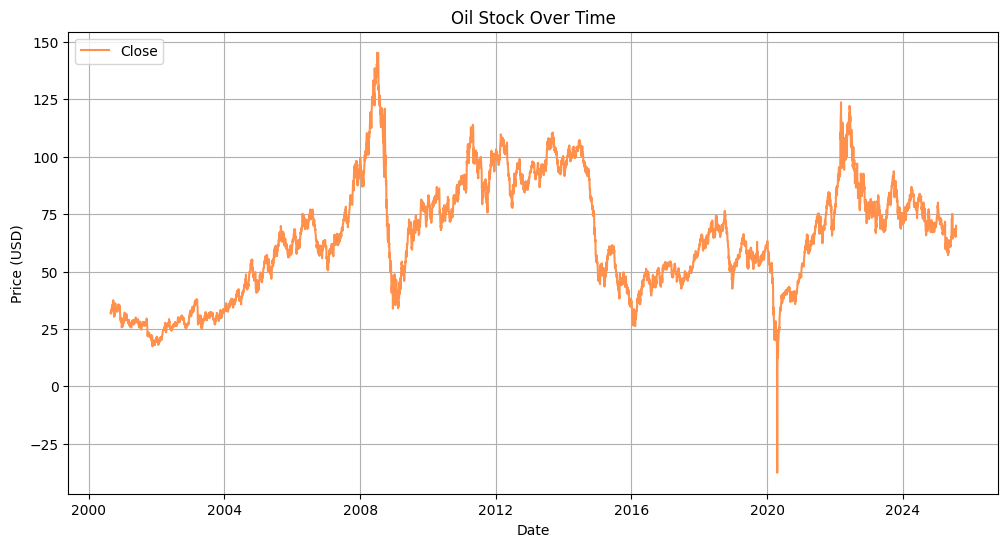

In [3]:
plt.figure(figsize=(12,6))
plt.plot(oil_data.index, oil_data['Close'],label='Close',color='#FF914D')
plt.title('Oil Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive=seasonal_decompose(oil_data['Close'],model='additive',period=30)

In [5]:
trend_additive=decomposition_additive.trend
seasonal_additive=decomposition_additive.seasonal
residual_additive=decomposition_additive.resid

<function matplotlib.pyplot.show(close=None, block=None)>

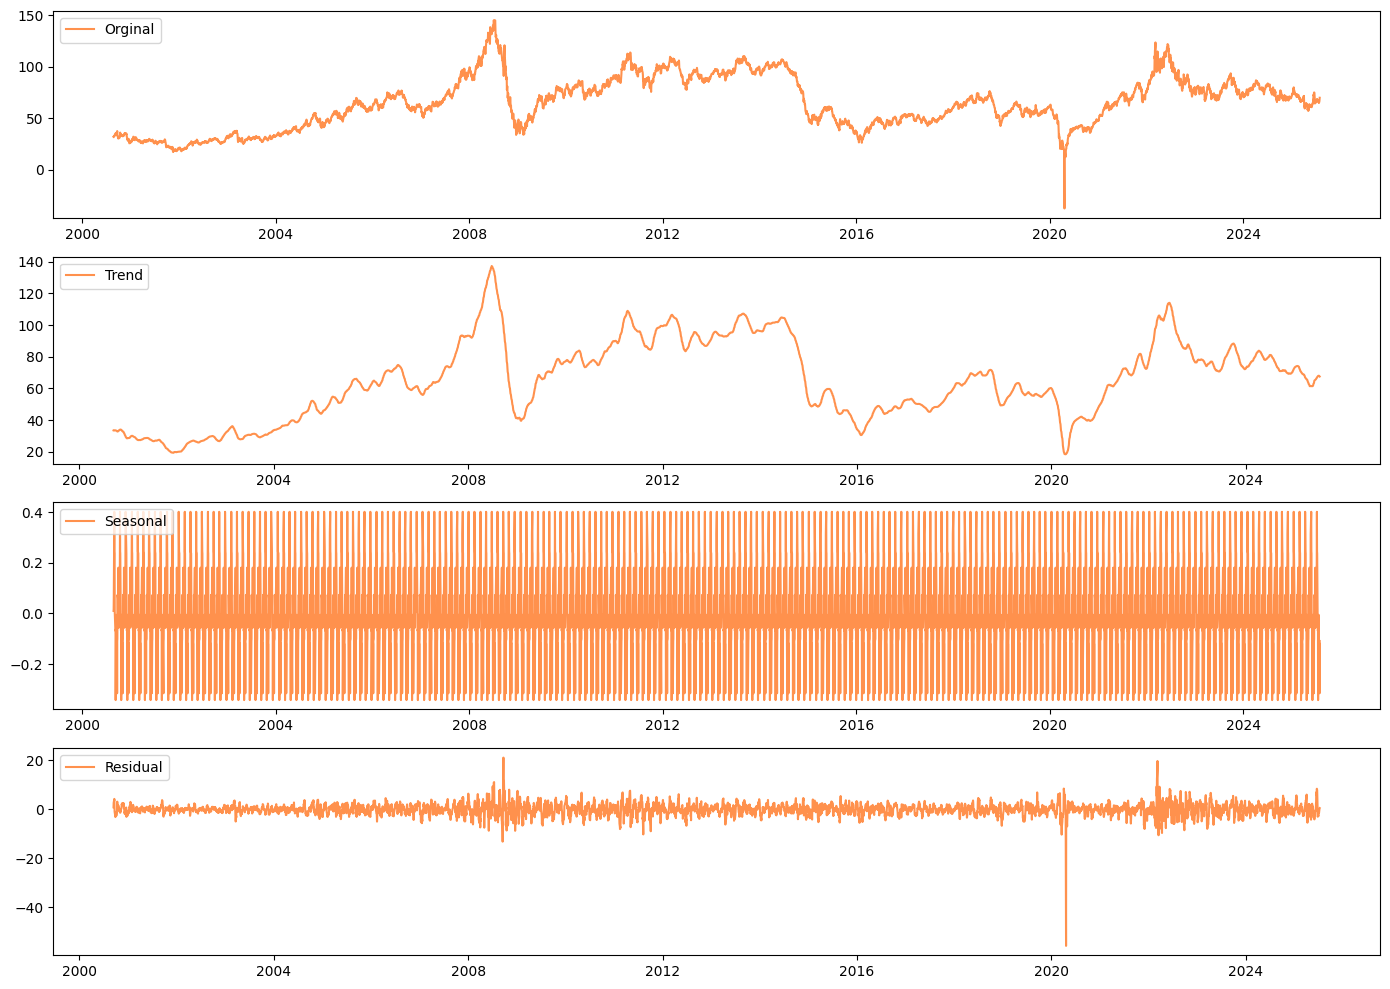

In [6]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(oil_data['Close'], label='Orginal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive,label='Residual',color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show


#STL Decomposition

In [7]:
from statsmodels.tsa.seasonal import STL

In [8]:
stl_data=STL(oil_data['Close'],period=30)
stl_result=stl_data.fit()

<function matplotlib.pyplot.show(close=None, block=None)>

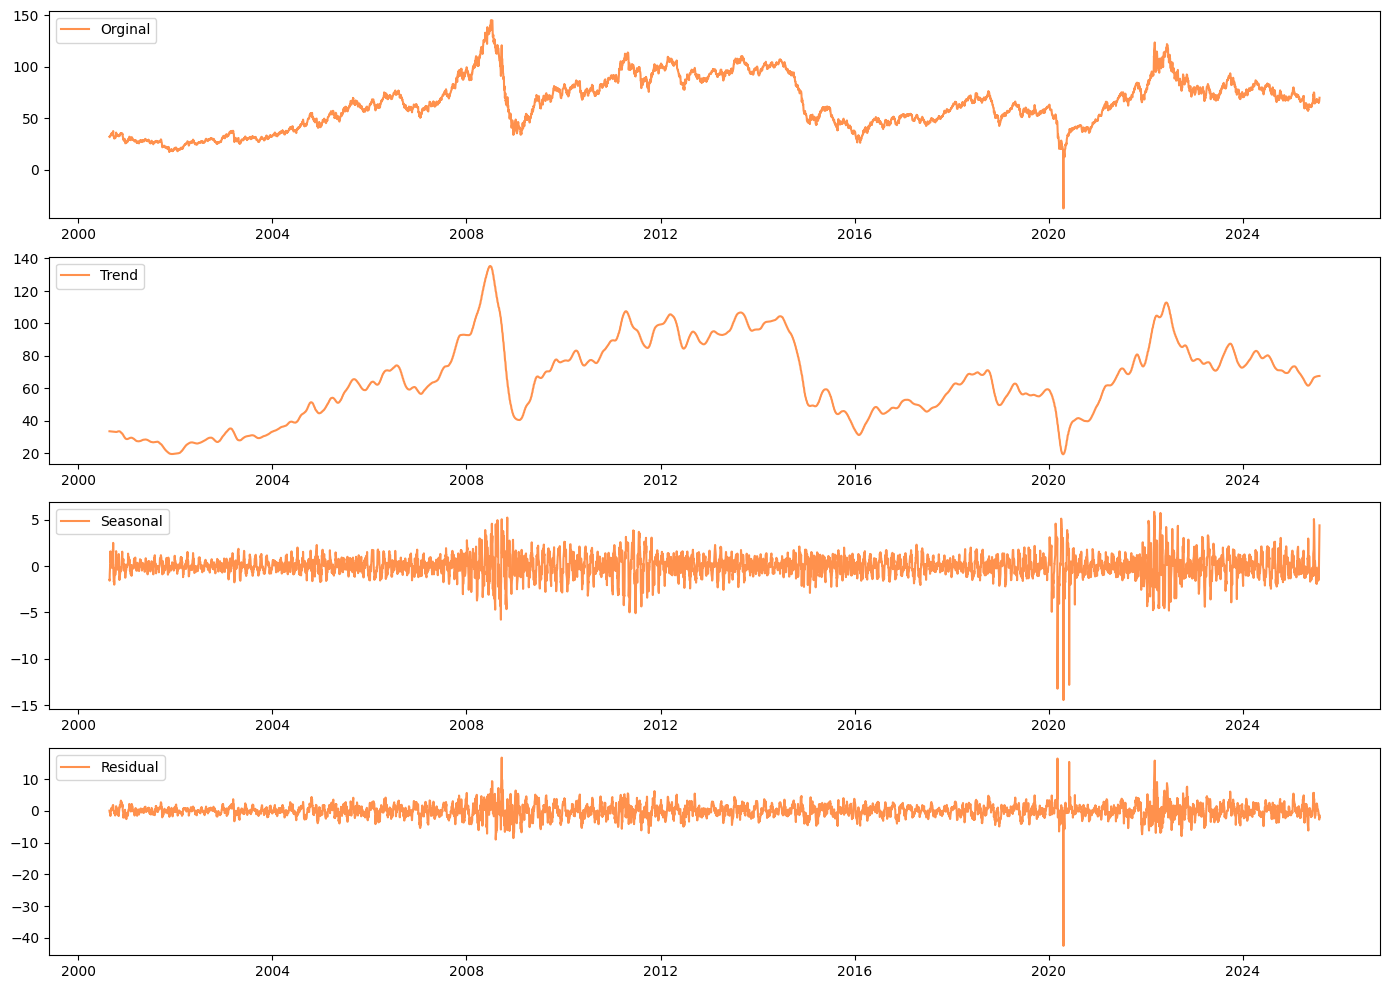

In [9]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stl_result.observed, label='Orginal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(stl_result.trend,label='Trend',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(stl_result.seasonal,label='Seasonal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(stl_result.resid, label='Residual',color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show

In [10]:
# Stationarity Test

from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(oil_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'    {key}: {round(value,3)}')

ADF Test Results:
ADF Statistic: -2.872
p-value: 0.049
Critical Values:
    1%: -3.431
    5%: -2.862
    10%: -2.567


In [12]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(oil_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'    {key}: {value}')

KPSS Test Results:
KPSS Statistic: 1.37
p-value: 0.01
Critical Values:
    10%: 0.119
    5%: 0.146
    2.5%: 0.176
    1%: 0.216


C:\Users\shawo\AppData\Local\Temp\ipykernel_13960\2412547629.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(oil_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend


In [13]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'time_series_data' is your time series data
result = adfuller(oil_data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:  # Check p-value against significance level (e.g., 0.05)
    print("Reject the null hypothesis: The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis: The time series may be non-stationary.")


ADF Statistic: -2.872432
p-value: 0.048649
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject the null hypothesis: The time series is likely stationary.


Make It Stationary

In [14]:
oil_series = oil_data['Close'].copy()

In [15]:
oil_diff = oil_series.diff().dropna()

In [19]:
def test_stationarity(series, name):
    print(f"\n{'-'*50}")
    print(f"Testing: {name}")
    print(f"{'-'*50}")
    
    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f"  Statistic: {adf_result[0]:.6f}")
    print(f"  p-value: {adf_result[1]:.6f}")
    print("  Critical Values:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.4f}")
    
    # KPSS Test (use 'c' for constant since we've differenced)
    kpss_result = kpss(series, regression='c', nlags='auto')
    print("\nKPSS Test:")
    print(f"  Statistic: {kpss_result[0]:.6f}")
    print(f"  p-value: {kpss_result[1]:.6f}")
    print("  Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"    {key}: {value:.4f}")


In [20]:
# Test the differenced series
test_stationarity(oil_diff, "First Difference")


--------------------------------------------------
Testing: First Difference
--------------------------------------------------
ADF Test:
  Statistic: -13.116078
  p-value: 0.000000
  Critical Values:
    1%: -3.4314
    5%: -2.8620
    10%: -2.5670

KPSS Test:
  Statistic: 0.054083
  p-value: 0.100000
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390


C:\Users\shawo\AppData\Local\Temp\ipykernel_13960\565500508.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


In [21]:
if kpss(oil_diff, regression='c', nlags='auto')[1] < 0.05:
    print("\nFirst difference not sufficient - trying seasonal differencing")
    # Use 30-day seasonality based on your STL decomposition
    seasonal_diff = oil_series.diff(periods=30).dropna()
    test_stationarity(seasonal_diff, "Seasonal Difference (30 days)")
    
    # If seasonal differencing isn't sufficient, try combined approach
    if kpss(seasonal_diff, regression='c', nlags='auto')[1] < 0.05:
        print("\nSeasonal difference not sufficient - trying combined differencing")
        combined_diff = oil_series.diff().diff(periods=30).dropna()
        test_stationarity(combined_diff, "Combined Regular + Seasonal Difference")

# If differencing isn't sufficient, try log transformation + differencing
if not (adfuller(oil_diff)[1] < 0.05 and kpss(oil_diff, regression='c', nlags='auto')[1] > 0.05):
    print("\nDifferencing not sufficient - trying log transformation + differencing")
    oil_log = np.log(oil_series)
    log_diff = oil_log.diff().dropna()
    test_stationarity(log_diff, "Log First Difference")


C:\Users\shawo\AppData\Local\Temp\ipykernel_13960\653981092.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  if kpss(oil_diff, regression='c', nlags='auto')[1] < 0.05:
C:\Users\shawo\AppData\Local\Temp\ipykernel_13960\653981092.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  if not (adfuller(oil_diff)[1] < 0.05 and kpss(oil_diff, regression='c', nlags='auto')[1] > 0.05):



Using First Difference as stationary series


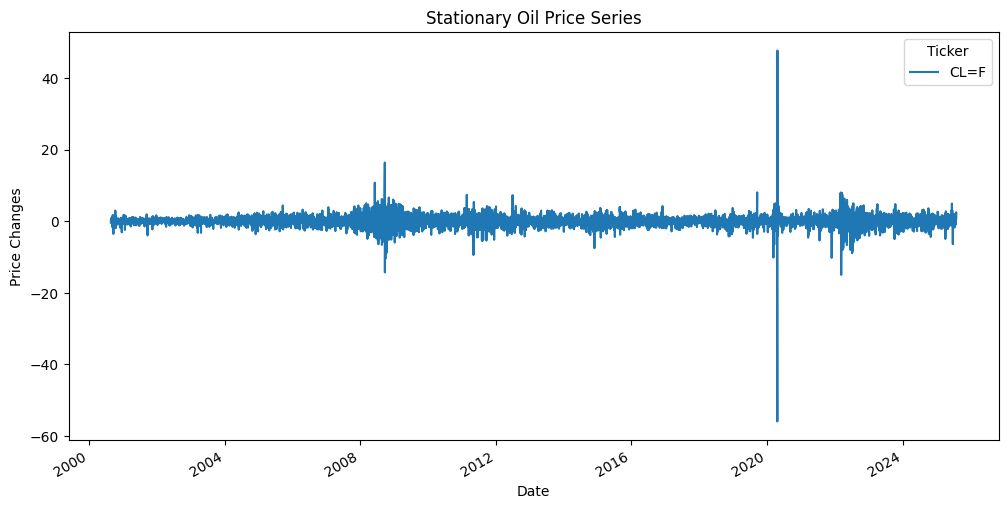

In [22]:
# Final transformation selection
# (Typically either first difference or log first difference works best for oil prices)
stationary_series = oil_diff  # Default to first difference

# Use log first difference if it shows better stationarity
if 'log_diff' in locals():
    log_adf = adfuller(log_diff)[1]
    log_kpss = kpss(log_diff, regression='c', nlags='auto')[1]
    
    if log_adf < 0.05 and log_kpss > 0.05:
        stationary_series = log_diff
        print("\nSelected Log First Difference as stationary series")
    else:
        print("\nUsing First Difference as stationary series")
else:
    print("\nUsing First Difference as stationary series")

# Plot the final stationary series
stationary_series.plot(title="Stationary Oil Price Series", figsize=(12, 6))
plt.ylabel("Price Changes")
plt.show()

In [23]:
# Final stationarity check on transformed series
final_adf = adfuller(stationary_series)
final_kpss = kpss(stationary_series, regression='c', nlags='auto')

print("\nFINAL STATIONARITY VERIFICATION")
print("-" * 50)
print("ADF Result:")
print(f"  Statistic: {final_adf[0]:.4f} (Target: < -2.862)")
print(f"  p-value: {final_adf[1]:.4f} (Target: < 0.05)")
print("\nKPSS Result:")
print(f"  Statistic: {final_kpss[0]:.4f} (Target: < 0.146)")
print(f"  p-value: {final_kpss[1]:.4f} (Target: > 0.05)")
print("-" * 50)

if final_adf[1] < 0.05 and final_kpss[1] > 0.05:
    print("✅ CONFIRMED STATIONARY (Both tests passed)")
elif final_adf[1] < 0.05:
    print("⚠️ Weakly stationary (ADF passed but KPSS failed)")
elif final_kpss[1] > 0.05:
    print("⚠️ Weakly stationary (KPSS passed but ADF failed)")
else:
    print("❌ NON-STATIONARY (Both tests failed)")


FINAL STATIONARITY VERIFICATION
--------------------------------------------------
ADF Result:
  Statistic: -13.1161 (Target: < -2.862)
  p-value: 0.0000 (Target: < 0.05)

KPSS Result:
  Statistic: 0.0541 (Target: < 0.146)
  p-value: 0.1000 (Target: > 0.05)
--------------------------------------------------
✅ CONFIRMED STATIONARY (Both tests passed)


C:\Users\shawo\AppData\Local\Temp\ipykernel_13960\2547611019.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  final_kpss = kpss(stationary_series, regression='c', nlags='auto')


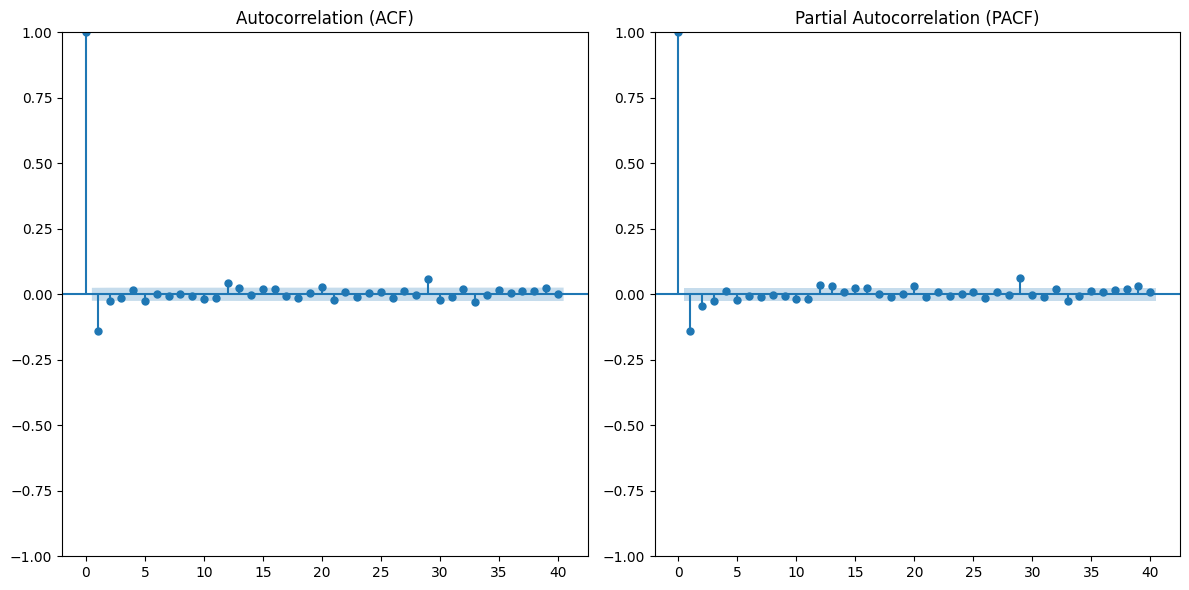

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of stationary series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(stationary_series, lags=40, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(122)
plot_pacf(stationary_series, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()

In [25]:
# Split data (80% train, 20% test)
train_size = int(len(stationary_series) * 0.8)
train = stationary_series[:train_size]
test = stationary_series[train_size:]

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Start with (1,0,1) as baseline - adjust based on ACF/PACF
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

d:\ML\Oil price project 2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ML\Oil price project 2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ML\Oil price project 2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   CL=F   No. Observations:                 5007
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9877.982
Date:                Thu, 31 Jul 2025   AIC                          19763.964
Time:                        10:44:42   BIC                          19790.038
Sample:                             0   HQIC                         19773.102
                               - 5007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.023      0.087      0.930      -0.043       0.046
ar.L1          0.0972      0.025      3.894      0.000       0.048       0.146
ma.L1         -0.2918      0.025    -11.672      0.0

d:\ML\Oil price project 2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


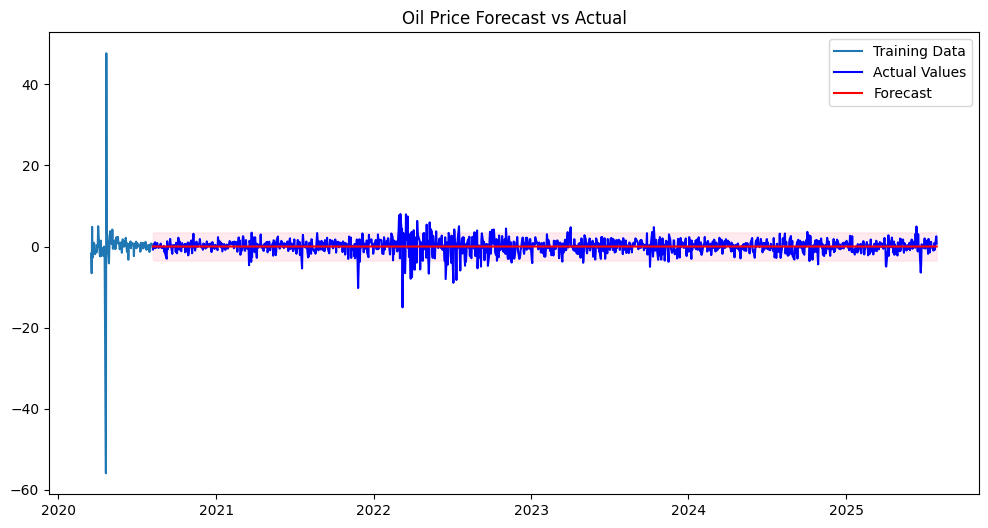

MAE: 1.3445, RMSE: 1.8841


In [27]:
# Forecast test period
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)

# Get prediction and confidence intervals
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index[-100:], train[-100:], label='Training Data')
plt.plot(test.index, test, label='Actual Values', color='blue')
plt.plot(test.index, pred, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('Oil Price Forecast vs Actual')
plt.legend()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

d:\ML\Oil price project 2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


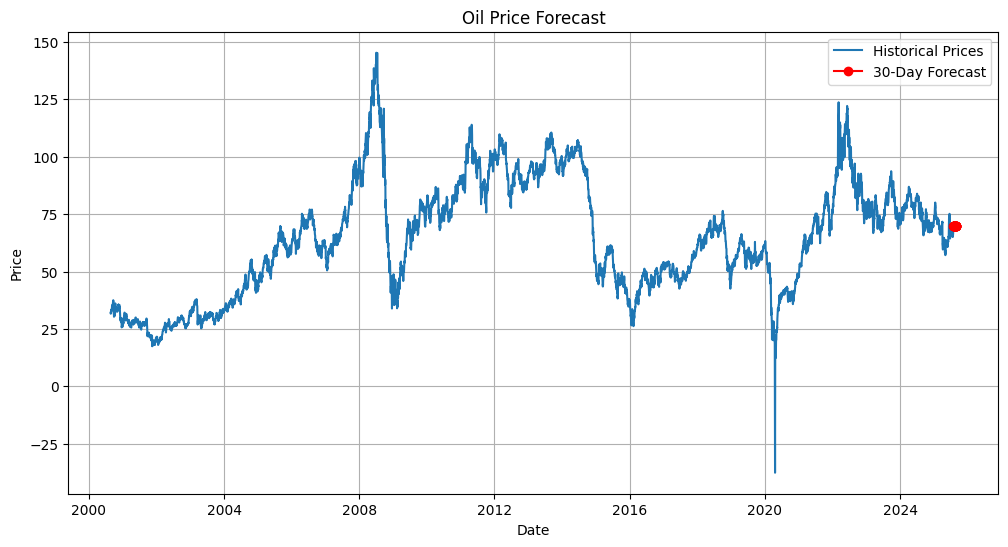

In [28]:
# 1. Recalculate with guaranteed length matching
last_price = oil_data['Close'].iloc[-1]
future_steps = 30 # Forecasting next 30 days
# Get forecasted differences
future_forecast = model_fit.get_forecast(steps=future_steps)  # Correct ARIMA model object
future_pred = future_forecast.predicted_mean

# Generate future dates starting TOMORROW
future_dates = pd.date_range(
    start=oil_data.index[-1] + pd.Timedelta(days=1),
    periods=future_steps,
    freq='D'
)

# Reconstruct prices with perfect alignment
future_prices = [last_price]  # Start with last known price
for i in range(future_steps):
    next_price = future_prices[-1] + future_pred.iloc[i]
    future_prices.append(next_price)

# Convert to pandas Series with correct dates (including start date)
forecast_series = pd.Series(
    future_prices,
    index=pd.date_range(
        start=oil_data.index[-1],
        periods=future_steps + 1,  # Include start date
        freq='D'
    )
)

# 2. Create the plot properly
plt.figure(figsize=(12,6))
plt.plot(oil_data['Close'], label='Historical Prices')

# Plot only the FORECAST portion (skip the last historical point)
plt.plot(
    forecast_series.index[1:],  # Start from first future date
    forecast_series.values[1:],   # Start from first future price
    'ro-',  # Red circles connected by lines
    label='30-Day Forecast'
)

plt.title('Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# Ensure forecast_series is defined in a previous cell
if 'forecast_series' in locals():
    print(f"Historical series length: {len(oil_data)}")
    print(f"Forecast series length: {len(forecast_series)}")
    print(f"Dates to plot: {len(forecast_series.index[1:])}")
    print(f"Values to plot: {len(forecast_series.values[1:])}")
else:
    print("Error: 'forecast_series' is not defined. Please define it in a previous cell.")


Historical series length: 6260
Forecast series length: 31
Dates to plot: 30
Values to plot: 30


Saving model

In [30]:
import pickle

In [31]:
filename=('trained_oil_price_model.sav')
pickle.dump(model_fit, open(filename, 'wb'))

In [32]:
loaded_model= pickle.load(open(filename, 'rb'))